# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

## Background

A technology startup is experiencing high employee turnover and the company lacks a deep understanding of the primary reasons why employees are choosing to resign. We assumed to be working in the Data Scientist team and we are expected to provide comprehensive data analysis to identify the contributing factors.

## Problem

The primary problem facing the company is high employee turnover. This not only increases recruitment and training costs but can also disrupt team productivity and ongoing projects. The company needs effective solutions to reduce turnover and improve employee retention.

## Goals

Identify the key factors tha lead to employees to resign and build a predictive model to anticipate employees who are likely to resign in the future. This model will enable the company to take proactive measures.

## Data

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

# EDA  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

The data has a total of 25 columns and 287 rows.
Columns 'Username', 'EnterpriseID', 'Email', 'NomorHP' are the columns unique to each employees. 
- 'Username': Username for each employee
- 'EnterpriseID': ID for each employee
- 'StatusPernikahan': Marriage status 
- 'JenisKelamin': Gender
- 'StatusKepegawaian': Employee status
- 'Pekerjaan': Job position
- 'JenjangKarir': Progression of an employee's career
- 'PerformancePegawai': Employee's performance
- 'AsalDaerah': Area of origin 
- 'HiringPlatform': The platform where employees got hired
- 'SkorSurveyEngagement': Engagement survey score
- 'SkorKepuasanPegawai': Employee satisfaction score
- 'JumlahKeikutsertaanProjek': Number of project participation
- 'JumlahKeterlambatanSebulanTerakhir': Number of Late Arrivals in the Past Month
- 'JumlahKetidakhadiran': Number of Absences
- 'NomorHP': Phone number
- 'Email': Email 
- 'TingkatPendidikan': Level of Education 
- 'PernahBekerja': Previously Worked
- 'IkutProgramLOP': Participated in the LOP Program
- 'AlasanResign': Reason for Resignation
- 'TanggalLahir': Date of Birth
- 'TanggalHiring': Date of Joining the company
- 'TanggalPenilaianKaryawan': Date of Employee Performance Review
- 'TanggalResign': Date of Resignation

In [5]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
261,madSardines6,106459,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,...,+6281393313xxx,madSardines6012@yahoo.com,Sarjana,1,NaN,NaN,1985-01-07,2011-01-10,2017-04-05,-
8,lyingMussel8,110533,Bercerai,Pria,FullTime,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Employee_Referral,...,+6281276485xxx,lyingMussel8944@proton.com,Magister,1,NaN,masih_bekerja,1980-08-26,2016-07-06,2020-2-28,-
129,soreEggs6,105592,Lainnya,Pria,FullTime,Software Engineer (Android),Freshgraduate_program,Sangat_kurang,Jakarta Timur,LinkedIn,...,+6287725725xxx,soreEggs6451@yahoo.com,Magister,1,NaN,kejelasan_karir,1979-09-14,2011-11-07,2020-2-27,2014-04-07
96,cockyBuzzard5,110932,Menikah,Wanita,FullTime,Software Engineer (Android),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6289794136xxx,cockyBuzzard5324@proton.com,Sarjana,1,NaN,masih_bekerja,1966-03-17,2014-05-05,2020-1-21,-
103,sincereSeafowl4,110793,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_kurang,Jakarta Barat,Diversity_Job_Fair,...,+6285756514xxx,sincereSeafowl4749@hotmail.com,Sarjana,1,NaN,jam_kerja,1970-05-15,2011-11-07,2017-4-29,2018-11-15


In [6]:
cat_var = df.drop(columns=['Username','EnterpriseID','NomorHP','Email'])


for i in cat_var:
    print("-" * 30) 
    print(f'Columns: {i}')
    print(cat_var[i].value_counts())
print("=" * 30) 

------------------------------
Columns: StatusPernikahan
StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64
------------------------------
Columns: JenisKelamin
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64
------------------------------
Columns: StatusKepegawaian
StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64
------------------------------
Columns: Pekerjaan
Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Pro

In [7]:
df[df['AlasanResign'] == 'Product Design (UI & UX)']

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
27,pluckyApples4,110566,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,LinkedIn,...,+6281988935xxx,pluckyApples4880@icloud.com,Sarjana,1,NaN,Product Design (UI & UX),1987-04-10,2016-07-06,2020-1-28,2016-08-07
124,dearKitten3,111266,Belum_menikah,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,...,+6289679074xxx,dearKitten3235@yahoo.com,Sarjana,1,NaN,Product Design (UI & UX),1989-05-02,2011-9-26,2014-03-02,2017-12-15
147,brainyLlama9,100884,Menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,...,+6285503547xxx,brainyLlama9557@gmail.com,Sarjana,1,NaN,Product Design (UI & UX),1969-02-09,2012-03-07,2014-02-01,2016-4-24
203,hushedBobolink8,106392,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Selatan,Website,...,+6285522082xxx,hushedBobolink8263@outlook.com,Sarjana,1,NaN,Product Design (UI & UX),1988-08-29,2012-01-09,2020-02-01,2018-04-01


In [8]:
# Change data types to data time

timestamp_var = ['TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan']
for i in timestamp_var:
    df[i] = pd.to_datetime(df[i])
    

There is '-' value in 'TanggalResign', hence, it cant be replaced with date time data type

In [9]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000,287,287,287
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241,1979-02-14 01:15:15.679442496,2013-02-04 23:14:50.592334592,2018-09-29 18:48:55.191637504
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1951-01-02 00:00:00,2006-01-09 00:00:00,2011-07-14 00:00:00
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000,1973-12-03 00:00:00,2011-07-11 00:00:00,2017-05-03 12:00:00
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000,1980-09-30 00:00:00,2013-04-01 00:00:00,2020-01-16 00:00:00
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000,1986-05-31 00:00:00,2014-08-18 00:00:00,2020-02-04 00:00:00
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000,1992-08-17 00:00:00,2018-07-09 00:00:00,2020-02-28 00:00:00
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548,NaN,NaN,NaN


In [10]:
# Check Duplicate Value
df[df.duplicated()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign


There is no duplicate data in this dataset

In [11]:
# Check Missing Value
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

Missing values can be seen on several columns; 
- 'SkorKepuasanPegawai' has minimal missing values (5) and the overall data distribution is near normal, hence, the missing values will be filled with median as it is more robust.
- 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir' and 'JumlahKetidakhadiran' also have minimal missing values, (3), (1) and (6), respectively. Median will be used to fill in missing values.
- 'AlasanResign'= In this columns, there are 66 missing values, which may implies to the employees that are still working in the company. The missing value (66) added up with the 'masih_bekerja' value (132), equal to 198 which is in line with the column 'TanggalResign' that has '-' values. Hence, the missing value will be filled with 'masih_bekerja'
- 'IkutProgramLOP' has the most missing values, almost 90% of its data. Hence, the missing value will be replaced with unknown value. 
- In column 'StatusPernikahan', there is 3 '-' values which will be replaced with the column's mode. 

In [12]:
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-',df['StatusPernikahan'].mode().iloc[0])
df['AlasanResign'] = df['AlasanResign'].fillna(df['AlasanResign'].mode().iloc[0])
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median())
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median())
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median())
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median())
df['IkutProgramLOP'] = df['IkutProgramLOP'].fillna('Unknown')

In [13]:
df.PernahBekerja.value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

In [14]:
# drop column PernahBekerja as it has only one unique value
df = df.drop(columns='PernahBekerja')

In [15]:
df['TanggalResign'] = df['TanggalResign'].replace('-', pd.NA)
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

In [16]:
df['Year_Hiring'] = df['TanggalHiring'].dt.year
df['Year_Resign'] = df['TanggalResign'].dt.year

In [17]:
Hired = df.groupby('Year_Hiring').size().reset_index()
Resigned = df.groupby('Year_Resign').size().reset_index()
print(Hired)
print(Resigned)

    Year_Hiring   0
0          2006   1
1          2007   2
2          2008   2
3          2009   7
4          2010   8
5          2011  76
6          2012  41
7          2013  43
8          2014  56
9          2015  31
10         2016  14
11         2017   5
12         2018   1
   Year_Resign   0
0       2013.0   5
1       2014.0  12
2       2015.0   8
3       2016.0   8
4       2017.0  19
5       2018.0  26
6       2019.0   5
7       2020.0   6


In [18]:
# Rename Columns
Hired = Hired.rename(columns={'Year_Hiring': 'Year'})
Resigned = Resigned.rename(columns={'Year_Resign': 'Year'})

# Merge Hired and Resigned 
HiredResigned = pd.merge(Hired, Resigned, left_on='Year', right_on='Year', how='outer')
HiredResigned = HiredResigned.fillna(0)
HiredResigned = HiredResigned.rename(columns={'0_x': 'Number_Hired', '0_y': 'Number_Resigned'})

# Calculate Total Number of Employee every year
HiredResigned['Total_Employee'] = HiredResigned['Number_Hired'].cumsum() - HiredResigned['Number_Resigned'].cumsum()
HiredResigned['Changes'] = HiredResigned['Number_Hired'] - HiredResigned['Number_Resigned']
HiredResigned

,Year,Number_Hired,Number_Resigned,Total_Employee,Changes
0,2006.0,1.0,0.0,1.0,1.0
1,2007.0,2.0,0.0,3.0,2.0
2,2008.0,2.0,0.0,5.0,2.0
3,2009.0,7.0,0.0,12.0,7.0
4,2010.0,8.0,0.0,20.0,8.0
5,2011.0,76.0,0.0,96.0,76.0
6,2012.0,41.0,0.0,137.0,41.0
7,2013.0,43.0,5.0,175.0,38.0
8,2014.0,56.0,12.0,219.0,44.0
9,2015.0,31.0,8.0,242.0,23.0


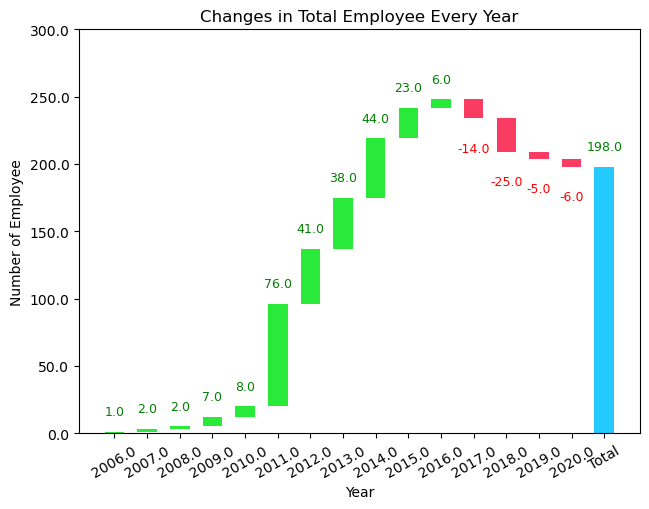

In [19]:
import waterfall_chart
%matplotlib inline

a = HiredResigned['Year']
b = HiredResigned['Changes']
waterfall_chart.plot(a, b, net_label='Total')
plt.xlabel('Year')
plt.ylim(0,300)
plt.ylabel('Number of Employee')
plt.title('Changes in Total Employee Every Year')
plt.show()


Analysis Results:
- The plot shows an overall increasing trend of the number of total employees from 2006 to 2020. This suggests that the company has been growing and expanding its workforce. 
- The total number of employees is experiencing a sharp increase in 2011 and its constantly increasing until 2016.
- Despite a period of stability, the company experienced a steep decline in its workforce in 2017 and 2018, indicating a substantial number of employees resigned. While the decline continued until 2020, the rate of attrition slowed down in the latter years.  

Insights:
- The initial growth suggests effective recruitment, but the decline indicates potential issues with employee retention. 
- The downward trends in the waterfall chart represent employee turnover. Investigating the specific years with the steepest declines (2017 & 2018) can help identify factors contributing to high attrition rates. External and internal factors may affects employee turnover, hence, further analysis is needed on these years. 



In [20]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Year_Hiring,Year_Resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,0.0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,0.0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,2013,2018.0


In [21]:
# Create data frame for employees who are already resigned and still active
Resign_no = df[df['Year_Resign'].isnull()]
Resign_yes = df[df['Year_Resign'].notnull()]

In [24]:
# Aggregate the dataframe based on job position
resign_yes_job = Resign_yes.groupby('Pekerjaan').size().reset_index(name='Count')
resign_no_job = Resign_no.groupby('Pekerjaan').size().reset_index(name='Count')

print('Job position for Resigned Employees', resign_yes_job)
print("-" * 100) 
print('Job position for Active Employees',resign_no_job)

Job position for Resigned Employees                        Pekerjaan  Count
0                   Data Analyst      8
1                  Data Engineer      3
2       Product Design (UI & UX)      9
3                Product Manager      6
4    Software Engineer (Android)      7
5   Software Engineer (Back End)     28
6  Software Engineer (Front End)     28
----------------------------------------------------------------------------------------------------
Job position for Active Employees                          Pekerjaan  Count
0                     Data Analyst      8
1                    Data Engineer      7
2                  DevOps Engineer      3
3          Digital Product Manager      2
4        Machine Learning Engineer      2
5         Product Design (UI & UX)     15
6   Product Design (UX Researcher)      1
7                  Product Manager     11
8                     Scrum Master      3
9               Software Architect      1
10     Software Engineer (Android)     17
11   

In [25]:
Pekerjaan_yes_no = pd.merge(resign_no_job, resign_yes_job, left_on='Pekerjaan', right_on='Pekerjaan', how='outer')
Pekerjaan_yes_no = Pekerjaan_yes_no.fillna(0)
Pekerjaan_yes_no = Pekerjaan_yes_no.rename(columns={'Count_x': 'Active_Employee', 'Count_y': 'Resigned_Employee'})
Pekerjaan_yes_no['total'] = Pekerjaan_yes_no['Active_Employee'] + Pekerjaan_yes_no['Resigned_Employee']
Pekerjaan_yes_no['active_percent'] = Pekerjaan_yes_no['Active_Employee']/Pekerjaan_yes_no['total']
Pekerjaan_yes_no['resign_percent'] = Pekerjaan_yes_no['Resigned_Employee']/Pekerjaan_yes_no['total']
Pekerjaan_yes_no

,Pekerjaan,Active_Employee,Resigned_Employee,total,active_percent,resign_percent
0,Data Analyst,8,8.0,16.0,0.500000,0.500000
1,Data Engineer,7,3.0,10.0,0.700000,0.300000
2,DevOps Engineer,3,0.0,3.0,1.000000,0.000000
3,Digital Product Manager,2,0.0,2.0,1.000000,0.000000
4,Machine Learning Engineer,2,0.0,2.0,1.000000,0.000000
5,Product Design (UI & UX),15,9.0,24.0,0.625000,0.375000
6,Product Design (UX Researcher),1,0.0,1.0,1.000000,0.000000
7,Product Manager,11,6.0,17.0,0.647059,0.352941
8,Scrum Master,3,0.0,3.0,1.000000,0.000000
9,Software Architect,1,0.0,1.0,1.000000,0.000000


In [40]:
import plotly.express as px

fig = px.sunburst(Pekerjaan_yes_no, path=['Pekerjaan'], values='active_percent',
                 color='Pekerjaan', hover_data=['Pekerjaan', 'active_percent', 'total'],
                 title='Percentage of Active Employees per Job Division',
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                 width=1000, height=800)

fig.update_traces(sort=True)
fig.update_layout(legend=dict(orientation="h", x=0, y=1.1))
fig.update_traces(hovertemplate="<br>".join([
    "<b>Job Division:</b> %{label}",
    "<b>Active Percentage:</b> %{value:.2%}"]))

fig.show()

The figure shows all the job division along with total active employees for each division

- DevOps Engineer, Digital Product Manager, Machine Learning Engineer, Product Design (UX Researcher), Scrum Master, Software Architect, and Software Engineer have 100% active employees, implying that there is no resigned employees
- Data analyst has the highest percentage of resignation rate, followed by Software Engineer, Product Design, Product Manager, Data Engineer, Software Engineer (Android) and Software Engineer (Back End)


In [32]:
# Aggregate Table for Resigned Data Analyis (Job Divisin with Highest Resignation Rate)
Data_Analyst_Resign = Resign_yes[Resign_yes['Pekerjaan'] == 'Data Analyst']
DA_resigned = Data_Analyst_Resign.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).agg(Pekerjaan=('Pekerjaan', 'count')).reset_index()
DA_resigned

,JenjangKarir,PerformancePegawai,AlasanResign,Pekerjaan
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


In [46]:
import plotly.express as px

fig = px.sunburst(DA_resigned, path=['JenjangKarir','PerformancePegawai','AlasanResign'], values='Pekerjaan',
                 color='Pekerjaan',  
                 hover_data=['JenjangKarir', 'PerformancePegawai', 'AlasanResign','Pekerjaan'], 
                 title='Career Path, Performance and Reason of Resignation',
                 color_discrete_sequence=px.colors.qualitative.Pastel, 
                  width=1000, height=800)

fig.update_traces(hovertemplate="""<b>Career Path:</b> %{customdata[0]}<br>
                                   <b>Performance:</b> %{customdata[1]}<br>
                                   <b>Resignation Reason:</b> %{customdata[2]}<br>
                                   <b>Job Title:</b> %{customdata[3]}""")


fig.update_traces(sort=True)
fig.update_layout(font=dict(size=12),legend=dict(font=dict(size=10)))
fig.show()

The figure reveals that toxic culture and internal conflict were the primary reasons for data analyst resignations. 
- Most of the departing data analysts were fresh graduates with strong performance records.
- However, toxic culture was a common factor for resignations across all performance levels, from very good to very poor.
- Internal conflict, on the other hand, seems to have been the primary reason for resignations among those with average or very good performance.


## Insights and Recommendations

Insights:
1. **Job Roles and Resignation Rates**: Certain roles, such as Data Analyst, Software Engineer, and Product Design, have higher resignation rates than others like DevOps Engineer, Digital Product Manager, and Scrum Master. This suggests that these roles might be particularly challenging or stressful, or that there are specific issues within these departments that are leading to employee turnover.
2. **Fresh Graduate Retention**: The high resignation rate is among fresh graduate data analysts and it is a concern. This may suggest that the expectations did not match the demands of the role, or a lack of adequate training and support for new hires.
3. **Toxic Culture as a Major Factor**: Toxic culture appears to be a significant reason to resignations particularly for the job with highest resignation rate, Data Analyst. This suggests that something is fundamentally wrong with the way the company operates or particularly in this job division. 
4. **Internal Conflict and Performance**: Employees with average or very good performance seems to be more likely to get into conflicts with others as they might have higher expectation to other employees. 

Recommendations:
1. **Role Analysis**: Conduct a thorough analysis of the roles with high resignation rates to identify potential causes of turnover. Consider factors such as workload, job satisfaction, and opportunities for growth.
2. **Fresh Graduate Onboarding and Support**: Implement an onboarding program to aid new graduates succeed in their role by providing them with training, mentorship, and support
3. **Address Toxic Culture**: Conduct a company-wide assessment of the culture to identify and address any toxic elements. This might involve implementing policies and procedures to promote a positive and inclusive workplace.
4. **Conflict Resolution Training**: Provide training to employees on conflict resolution and communication skills to help them navigate workplace challenges more effectively.
5. **Employee Engagement Surveys**: Conduct employee engagement surveys to gather feedback on job satisfaction, workplace culture, and opportunities for growth. Use this feedback to identify areas for improvement.